# Lab 4.1: Target Parameter Estimation

In [1]:
%matplotlib widget
import rad.css as css
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10
css.add_custom_css()

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

In [Lab 3.2: Detection](3_2_Detection.ipynb), we discussed the process of generating detections to identify the presence of target echoes. Once a target has been detected, an important subsequent process is to extract as much information as possible about the target from its echo. 

<div style="text-align: center"> <img src="img/radar_sys3.png" justify="center" width="700px"></img> </div>

Here are some of the major target attributes that can be estimated from an echo's characteristics:

- *Range*, calculated from the propagation delay
- *Angle*, dictated by beam pattern and steering of radar
- *Range rate*, observed in Doppler shift of echo
- *Radar cross section*, inferred from the strength of the echo

In this lab, we will go dive deeper into how each of these estimates are created and their associated accuracies.

## Accuracy and Signal-to-Noise Ratio

Each of the observable attributes of target can be estimated with a certain level of accuracy<sup>[1](#foot_acc)</sup>. It can be shown<sup>[[1]](#ref_skolnik)</sup> that the accuracy, $\alpha$, of each estimate is approximately:

$$
\alpha \approx \frac{\delta}{\sqrt{\mathrm{SNR}}}
$$

where $\delta$ is the resolution in that dimension and $\mathrm{SNR}$ is the signal-to-noise ratio of the detection. This result is important as it tells us that the estimate can be expected to be within a distance of $\alpha$ from the true value. To derive accuracies for radar measurements, we will go through the form of each estimate and corresponding resolution of each observable attribute, e.g., range, angle, range-rate.

## Range Estimation

<div style="text-align: center"> <img src="img/range_obs.png" justify="center" width="900px"></img> </div>

From [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we know that the range of the target, $r$, is related to the propagation delay, $\tau$, (i.e., duration between transmission of pulse and reception of echo) by:

$$
\tau = \frac{2r}{c}
$$

where $c$ is the speed of light. Rearranging, we see that we can derive range from the propagation delay as

$$
r = \frac{c\tau}{2}
$$

This means that if we can estimate the delay of the echo relative to transmission, we can translate that to a range estimate. This is luckily straightforward as a byproduct of detection is the time of detection (as we saw in [Lab 3.2: Detection](3_2_Detection.ipynb)). For instance, if we get a detection at time $t$ for a transmission at time $t_0$, then the propagation delay is $\tau = t - t_0$. Then, the range estimate, $\hat{r}$, for the detection is

$$
\hat{r} = \frac{c\cdot (t - t_0)}{2}
$$

Note that if the target is expected to move appreciably while the pulse propagates, this has to be taken into account in the range estimate.

From [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb), we saw that the range resolution, $\delta r$ , of a radar is related to the bandwidth of the transmitted wave, $B$ , by:

$$
\delta r = \frac{c}{2B}
$$

So, the accuracy of a range estimate from a detection, $\alpha_r$ , is

$$
\alpha_r = \frac{c}{2B\sqrt{\mathrm{SNR}}}
$$


***

### Question 1

**(a)** If a transmission is sent at $t_0 = 10~\mathrm{s}$, a detection is obtained at time $t = 10.00333~\mathrm{s}$. What is the range of the detected target?

In [2]:
qz.quiz_4_1_1a()

In [3]:
# Scratch space

**(b)** What is the range resolution, $\delta r$, for a radar using a transmission with bandwidth $B = 30~\mathrm{MHz}$?

In [4]:
qz.quiz_4_1_1b()

In [5]:
# Scratch space

**(c)** If the signal-to-noise ratio of the detection was $11~\mathrm{dB}$, what was the accuracy of the range estimate, $\alpha_r$?

In [6]:
qz.quiz_4_1_1c()

In [7]:
# Scratch space

***

## Angle Estimation

In [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb) and [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb), we learned how radars perform directed ranging by focusing and steering transmitted energy and then focusing and steering incident energy on receive. 

<div style="text-align: center"> <img src="img/focus_steer.png" justify="center" width="500px"></img> </div>

By using directed ranging, we can know (with some certainty) from what region of angle a detection is originating, i.e., mainlobe of radar beam pattern. This is what we will refer to as **mainlobe angle estimation**: narrowing down the possible target angle to within the current beam of the radar.

<div style="text-align: center"> <img src="img/angle_obs.png" justify="center" width="900px"></img> </div>

With this type of operation, the angle estimate created from a single pulse, $\hat{\phi}$ , (where $\phi$ is the true angle of the target) is the transmit-receive steering direction:

$$
\hat{\phi} = \theta
$$

and the angle accuracy, $\alpha_\phi$ , is approximately the beamwidth, $\Delta\theta$:

$$
\alpha_\phi \approx \Delta\theta
$$

The reason that the signal-to-noise ratio (SNR) does not appear in the angle accuracy expression is due to the fact that there is only *one* measurement; we know the detection came from inside the beam, but we cannot say where within the beam.

A common way to improve upon this is to use multiple pulses to refine the estimate of the angle using the beamshape---we will refer to this as **beamcenter angle estimation**. The main premise of this angle estimation method is that *<font color="BlueViolet">the received signal from a target will be its strongest when the target is in the center of the beam</font>*. We can see this, for example, from the circular aperture beam pattern example below.

interactive(children=(FloatSlider(value=1.0, description='Dish Radius (m)', max=30.0, min=0.1, style=SliderSty…

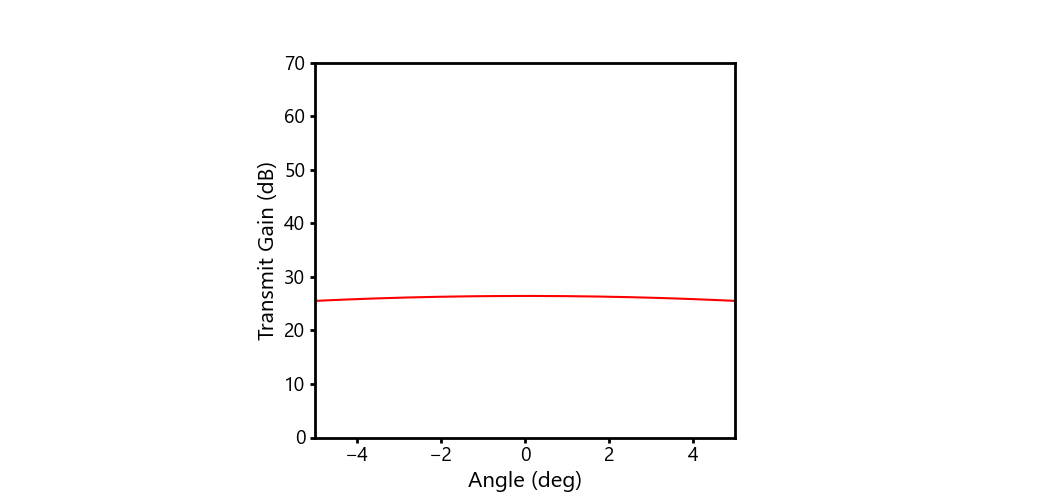

In [8]:
ex.ex_4_1_1()

To see how beamcenter angle estimation works, let us look at the interactive example below. In the example, there is a single target at range $r = 5~\mathrm{km}$ and azimuth $\phi = 45^\circ$. Using the *<font color="DarkBlue">Pulse Azimuth</font>* slider, investigate the pulses near the target. Watch as the peak from the target increases as you get closer to $\phi = 45^\circ$ azimuth.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Operation</b>"), Button(description='Scan'…

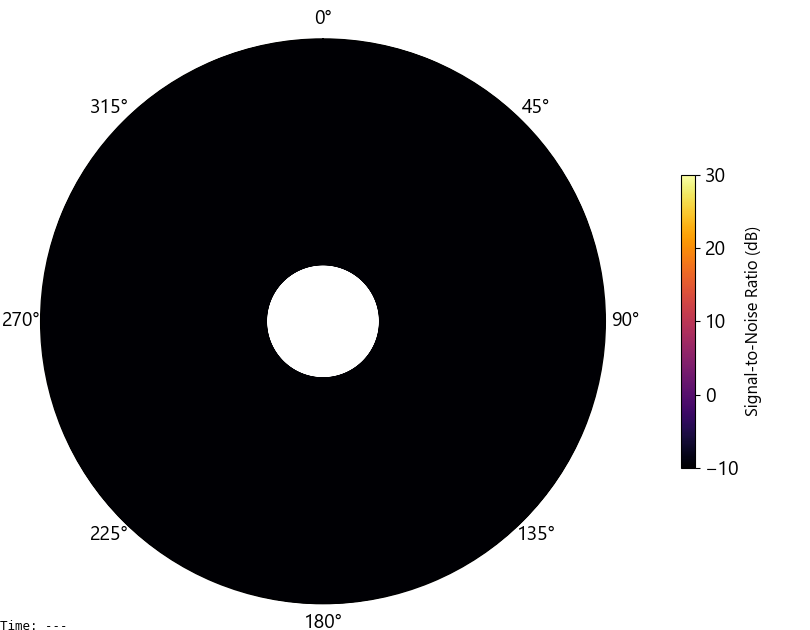

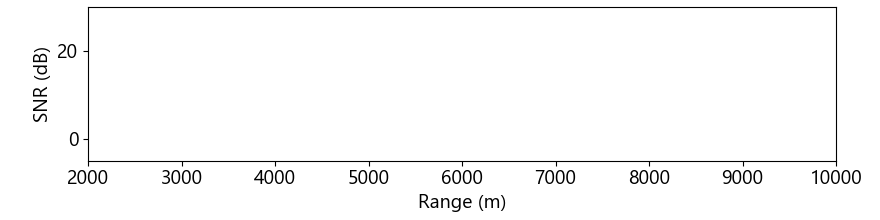

In [9]:
ex.ex_4_1_2()

Because we can now estimate where the target is in the center of the beam, we can greatly improve the accuracy of the angle estimate. The estimate itself, $\hat{\phi}$ , is still of the form:

$$
\hat{\phi} = \theta
$$

where $\theta$ is the steering direction that gave the highest peak for the target. The angle accuracy, however, is now approximately<sup>[2](#foot_beamcenter)</sup>

$$
\alpha_{\phi} \approx \frac{\Delta\theta}{\sqrt{\mathrm{SNR}}}
$$

This means that if our detection has an SNR of $20~\mathrm{dB} = 100$, the accuracy is *ten times* better than simply narrowing down the target to within the beamwidth, $\Delta \theta$.

***

### Question 2

**(a)** What is the angle estimation accuracy, $\alpha_\phi$ , using *mainlobe angle estimation* with a dish radar with diameter $D = 4~\mathrm{m}$ and transmit frequency $f = 3.5~\mathrm{GHz}$?

In [10]:
qz.quiz_4_1_2a()

In [11]:
# Scratch space

**(b)** What is the angle estimation accuracy, $\alpha_\phi$ , using *beamcenter angle estimation* with the same radar and a peak detection SNR of $\mathrm{SNR} = 14~\mathrm{dB}$?

In [12]:
qz.quiz_4_1_2b()

In [13]:
# Scratch space

***

Note that there are also techniques that can be employed that can obtain similar accuracy to beamcenter angle estimation but using only a *single* pulse---hence they are called **monopulse** angle estimation methods. Here are two common techniques:

- **Amplitude comparison monopulse**: Add another receive channel with a beam pattern designed to estimate of the target's location inside the beam (for each pulse)
- **Phase/delay comparison monopulse**: Analyze the different received delays/phases for each element in an array to infer incoming direction of wavefront (for each pulse)

### Cross-Range Resolution

Improving angle accuracy using beamcenter or monopulse angle estimation becomes critical for applications that require observing targets at long ranges. To see why this is true, we can consider the resolution in **cross-range**, $r_\perp$ , the dimension perpendicular to range, $r$ (see figure below). 

<div style="text-align: center"> <img src="img/cross_range.png" justify="center" width="400px"></img> </div>

It can be shown that the resolution in cross-range, $\delta r_{\perp}$ , is approximately

$$
\delta r_\perp \approx r \cdot \frac{\Delta \theta}{57.3^\circ}
$$

Note that cross range resolution grows with range. Thus, for observing objects at short ranges, this will not be an issue; however, for long range radar systems, this means observing at a target at range $r = 150~\mathrm{km}$ with a beamwidth of $\Delta\theta = 1^\circ$, the resolution in cross-range is

$$
\begin{align*}
\delta r_\perp &\approx r \cdot \frac{\Delta \theta}{57.3^\circ}\\
&= 150 \times 10^3 \cdot \frac{1^\circ}{57.3^\circ}\\
&= 2.62~\mathrm{km}
\end{align*}
$$

Therefore, the resolution in the cross-range dimension is $2.62~\mathrm{km}$ (about $1.6~\mathrm{mi}$), meaning targets have to be at least $2.62~\mathrm{km}$ apart for the radar to be able to tell there are two targets. We can verify this trend using interactive examples.

In this example, we will examine an *angle cut* across the radar display, showing all values at a specified range (see figure below).

<div style="text-align: center"> <img src="img/angle_cut.png" justify="center" width="300px"></img> </div>

In the interactive plot below, we can see how the peak response of a pulse changes as the radar scans through angle. In truth, there are two targets (positioned at the two **black** dashed lines). As we increase the *<font color="DarkBlue">Cross Range</font>* slider, the two targets will separate in cross range. As the targets separate, we can see a clear distinction between the mainlobe for the first and second targets. However, as we increase *<font color="DarkBlue">Range</font>* or *<font color="DarkBlue">Beamwidth</font>*, that separation will disappear. Try verifying the numbers from the example above, i.e., range of $r = 150~\mathrm{km}$, beamwidth of $\Delta\theta = 1^\circ$, and vary the cross range of the targets to see when it is apparent that there are two.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=0.5, des…

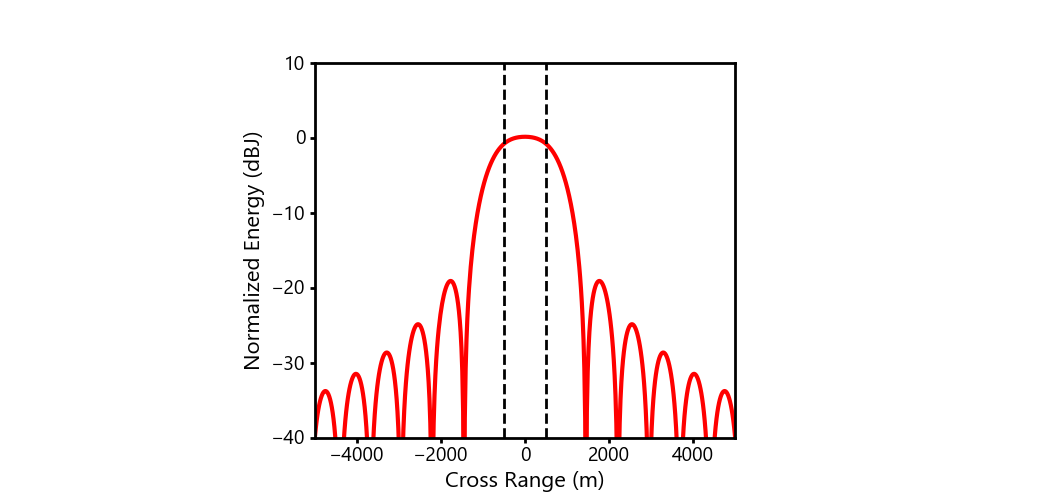

In [14]:
ex.ex_4_1_3()

***

### Question 3

What is the cross-range resolution, $\delta r_\perp$ , at range $r = 50~\mathrm{km}$ in the vertical dimension for a rectangular radar of height $a = 2.1~\mathrm{m}$ and transmit frequency $f = 3.5~\mathrm{GHz}$?

In [15]:
qz.quiz_4_1_3()

In [16]:
# Scratch space

***

## Range Rate Measurements

<div style="text-align: center"> <img src="img/range_rate_obs.png" justify="center" width="900px"></img> </div>

In most radar applications, observed targets will be moving. When a target is in motion relative to the radar, it slightly changes the transmitted signal causing the echo to differ slightly from what was emitted. This change is called the **Doppler effect**. It is caused by the wave dilating or contracting as it hits the moving target.

In the following example, we can see the difference between a transmitted sine wave versus its received echo for different target motions. It is easiest to picture in applications with slower propagation speeds; from [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb), we can recall the following interactive example that shows the Doppler effect when the wave propagation velocity is $v_p = 1000~\mathrm{m/s}$.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=50.0…

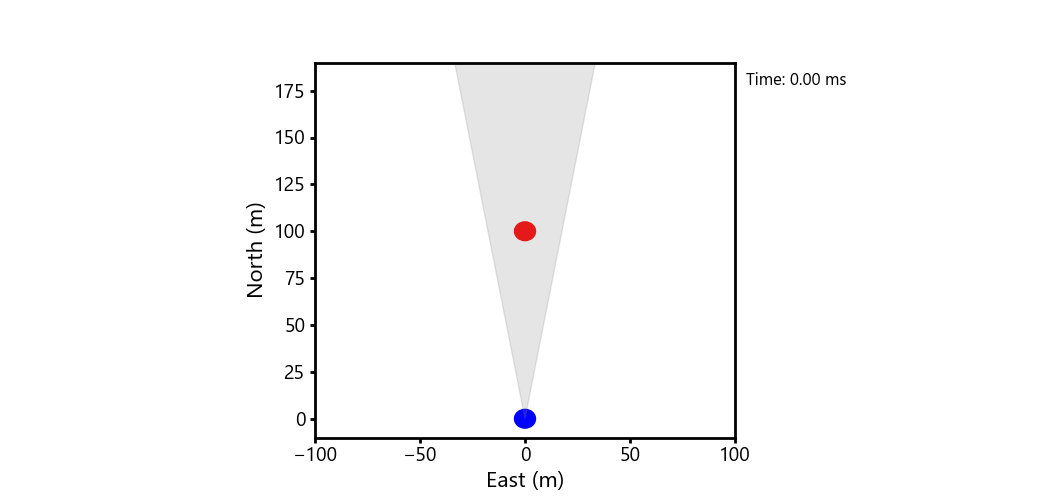

In [17]:
ex.ex_4_1_4()

In short, if the target moves toward the radar (i.e., negative range rate), the transmitted wave is compressed, increasing the frequency, while the opposite is true if the target moves away from the radar (i.e., positive range rate). In fact, with a little math, it can be shown that if a sine wave is transmitted with frequency $f$ and hits a target moving with range rate $\dot{r}$, then the frequency of the received sine wave, $f_r$ , will be<sup>[3](#foot_doppler)</sup>

$$
f_r = f + f_D
$$

where $f_D$ is the **Doppler shift** for a radar system defined as

$$
f_D = -\frac{2f\dot{r}}{c}
$$

We can rearrange the Doppler shift to get range rate as:

$$
\dot{r} = -\frac{c f_D}{2f}
$$

This equation tells us that it we can measure the difference between the transmitted frequency versus the received frequency (i.e., the Doppler shift), we can translate that into an estimate of range rate, $\dot{r}$.

***

### Question 4

**(a)** What is the Doppler shift, $f_D$ , for a target with a range rate of $\dot{r} = 500~\mathrm{m/s}$ when observed by a radar with transmit frequency $f = 1.5~\mathrm{GHz}$?

In [18]:
qz.quiz_4_1_4a()

In [19]:
# Scratch space

**(b)** If the incoming echo has a frequency that is $10~\mathrm{kHz}$ higher than the transmitted frequency of $f = 3~\mathrm{GHz}$ , what is the range rate of the target?

In [20]:
qz.quiz_4_1_4b()

In [21]:
# Scratch space

***

There are multiple methods for measuring a Doppler shift; here are some traditional techniques:

- **Continuous wave radar**: Transmit single frequency on a transmit aperture; listen for shifted frequencies on separate receive aperture
- **Pulse Doppler**: Transmit multiple pulses, store all received signals, and look for frequency-shifted echoes across received pulses

Continuous wave (CW) radar is very similar to the example above where a single sine wave was transmitted and then compared to the received echo. The reason it is called "continuous" is because there is traditionally one transmit aperture that is emitting a single frequency at all times. Alongside is a receive aperture that periodically listens to find sine waves of similar frequencies cause by echoes from moving targets. The duration of one listening period will be referred to as **observation time**, $\Delta t$. 

<div style="text-align: center"> <img src="img/cw.png" justify="center" width="750px"></img> </div>

A unique aspect of CW radar is that since it does not use the traditional pulses nature of radar to be able to estimate delay and then range. Due to this, CW radars are excellent at measuring target range rates but typically rely on other systems to determine range.

The resolution of a signal in frequency can be shown to be inversely proportional to the integration time:

$$\delta f = \frac{1}{\Delta t}$$

We can see this in the following interactive example, which investigates the traditional output of a CW radar. In the plot, we will see the response of a CW radar (without noise) to a single moving target with a RCS of $0~\mathrm{dBsm}$. The $x$ axis is relative frequency, meaning relative to the transmit frequency. The true Doppler shift due to the target is marked with a dashed line; note that this is coincident with the peak of the curve. Try varying the *<font color="DarkBlue">Transmit Frequency</font>*, *<font color="DarkBlue">Range Rate</font>*, and *<font color="DarkBlue">Observation Time</font>* sliders to see how the response changes.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

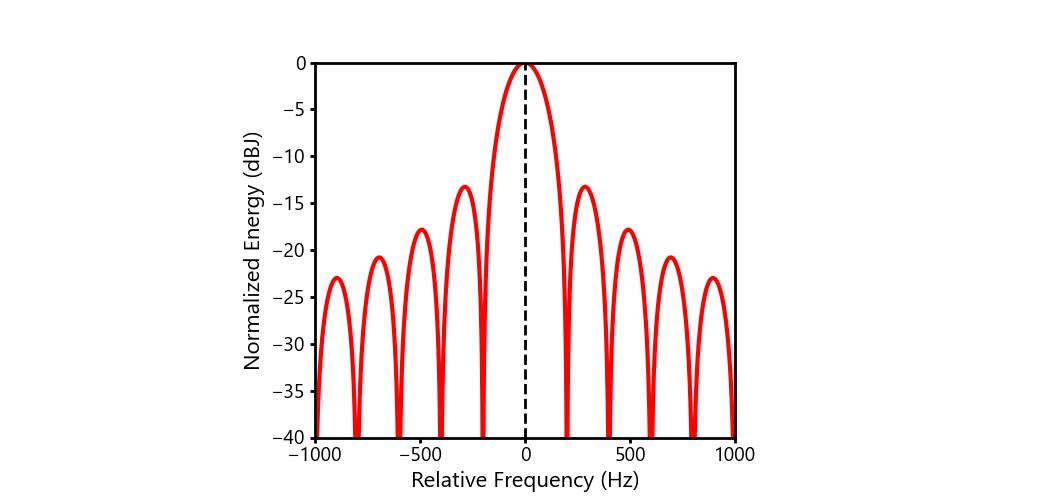

In [22]:
ex.ex_4_1_5()

We can see how the frequency shift relates to the *<font color="DarkBlue">Transmit Frequency</font>* and *<font color="DarkBlue">Range Rate</font>* and how the *<font color="DarkBlue">Integration Time</font>* changes the width of the lobe around the true frequency shift.

***

### Question 5

This plot shows the response of a CW radar with transmit frequency $f = 2~\mathrm{GHz}$ and integration time $\Delta t = 15~\mathrm{ms}$ observing a single moving target. What is the range rate of the target?

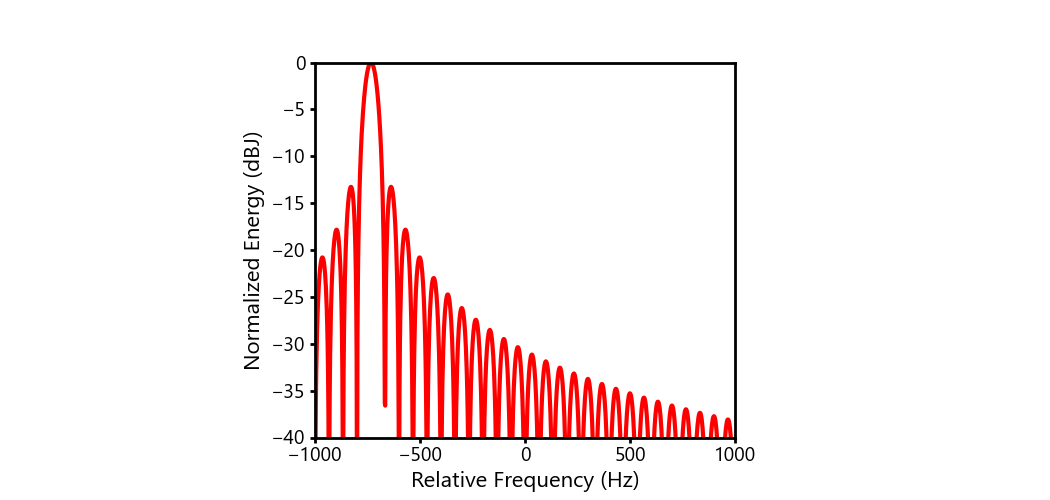

In [23]:
ex.ex_4_1_6()

In [24]:
qz.quiz_4_1_5()

In [25]:
# Scratch space

***

Pulse Doppler radar is a little more complicated than CW but allows for simultaneous measurement of range and range rate. The main idea is to: 

* Transmit multiple pulses with pulse repetition frequency, $f_{rep}$ , at the same region in space
* Collect all received echoes
* For a set of hypothesized ranges and Doppler shifts: matched filter at hypothesized range, remove hypothesized Doppler shift, and add all pulses
* Create image using all range and Doppler hypotheses to find target(s)

If a target exists at the hypothesized range and Doppler shift, all of the pulses will be corrected properly and will add constructively to create a strong entry in the image. The process is summarized in the figure below.

<div style="text-align: center"> <img src="img/pulse_dopp.png" justify="center" width="750px"></img> </div>

The image of showing of the resulting received signals after different Doppler shift corrections is called a **range-Doppler image** and is a common output of a radar system. In the interactive example below, we use a pulse Doppler radar to generate a range-Doppler image and find the range/range rate of a target.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=1.0,…

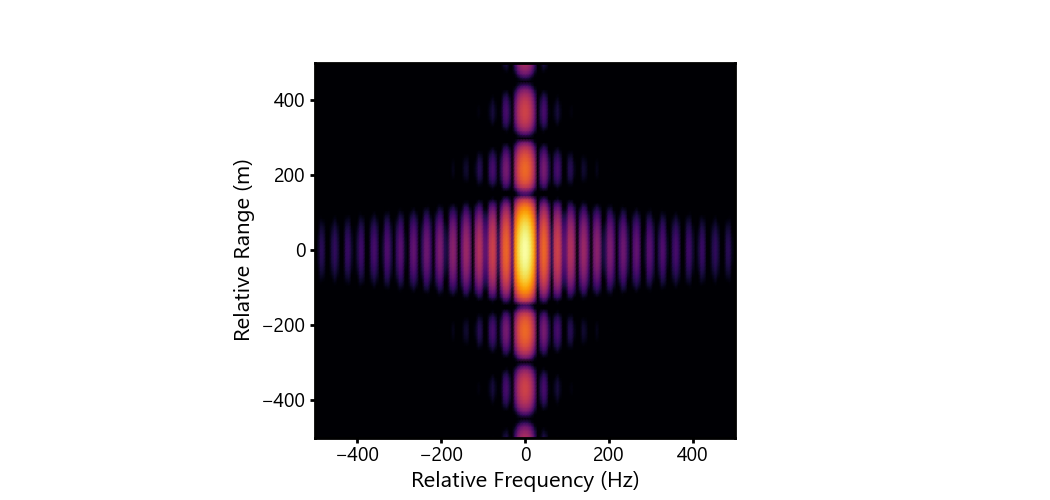

In [26]:
ex.ex_4_1_7()

The resolution for range rate, $\delta\dot{r}$ , can be shown to be approximately

$$
\delta\dot{r} \approx \frac{c}{2f\Delta t}
$$

where $\Delta t$ is observation time. For CW radar, $\Delta t$ is the amount of time that data is collected; for pulse Doppler, $\Delta t$ is the total time span of all transmit pulses. For example, if we transmitted a set of pulses that span $\Delta t = 150~\mathrm{ms}$ at a transmit frequency of $f = 1~\mathrm{GHz}$, the range rate resolution is approximately $\delta\dot{r} = 1~\mathrm{m/s}$.

Similar to the range and angle measurements discussed above, the range rate accuracy of a radar system, $\alpha_{\dot{r}}$, can be approximated by:

$$
\alpha_{\dot{r}} = \frac{c}{2f\Delta t\sqrt{\mathrm{SNR}}}
$$

The highest measurable Doppler shift is given by the rate that the multiple pulses are transmitted. For a set of pulses with pulse repetition frequency, $f_{rep}$ , the magnitude of Doppler shifts that can be unambiguously measured is bounded by:

$$
|f_D| < \frac{f_{rep}}{2}
$$

This can be translated to the span of range rates that can be unambiguously observed:

$$
|\dot{r}| < \frac{c f_{rep}}{4f}
$$

We can revisit the interactive example of a range-Doppler image and know see how the different controls can change the range and Doppler resolution and limits of the image.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Transmission</b>"), FloatSlider(value=1.0,…

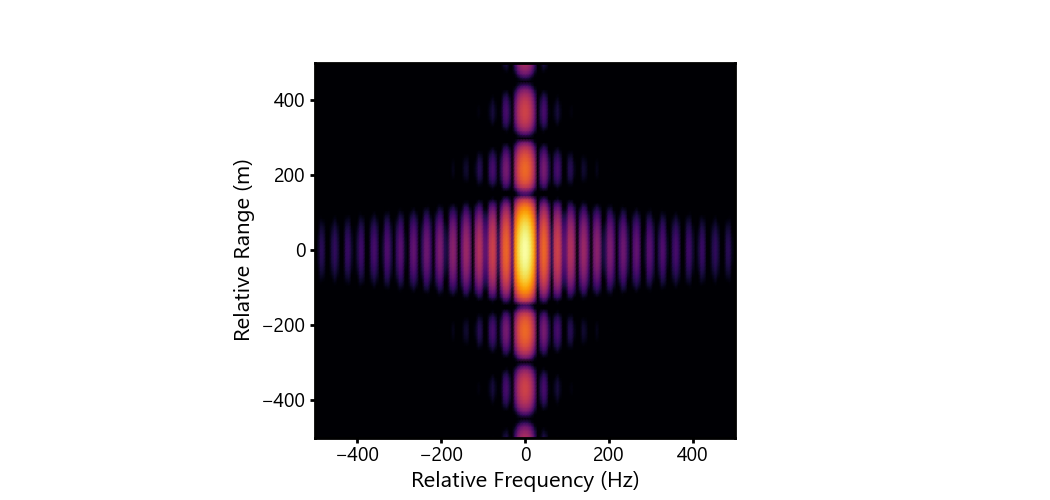

In [27]:
ex.ex_4_1_7()

***

### Question 6

**(a)** What is the range rate resolution, $\delta \dot{r}$, of a radar operating at transmit frequency $f = 5~\mathrm{GHz}$ and using an observation time of $\Delta t = 50~\mathrm{ms}$?

In [28]:
qz.quiz_4_1_6a()

In [29]:
# Scratch space

**(b)** What is the maximum (unambiguously) observable range rate for the radar in **(a)** if it uses a pulse repetition frequency of $f_p = 500~\mathrm{Hz}$?

In [30]:
qz.quiz_4_1_6b()

In [31]:
# Scratch space

***

## Radar Cross Section Estimation

In [Lab 2.1: Radar Range Equation](2_1_Radar_Range_Equation.ipynb), we saw that the effective size of a target as seen by the radar was summarized by its *radar cross section* (RCS). More specifically, the RCS, $\sigma$, is a key component of the received energy, $\mathcal{E}_r$, from a radar pulse:

$$
\mathcal{E}_r = \frac{\mathcal{E}_t G_t(\theta) G_r(\theta) \lambda^2}{(4\pi)^3 r^4} \cdot \sigma
$$

where

- $\mathcal{E}_t$ is the transmitted energy $(\mathrm{J})$
- $G_t(\theta)$ is the transmit gain in the transmit direction
- $G_r(\theta)$ is the receive gain in the receive direction
- $\lambda$ is the transmission wavelength ($\mathrm{m}$)
- $r$ is the range to the target ($\mathrm{m}$)

Fortunately, from knowledge of the radar system and the transmission, we know the transmitted energy, $\mathcal{E}_t$, the transmit gain, $G_t(\theta)$, the receive gain $G_r(\theta)$, and the transmit wavelength $\lambda$. Then, after detection and subsequent range estimation, we have estimates of received energy and range. This means we know all variables in the received energy equation except RCS, $\sigma$, so we can solve for it. Thus, the estimated RCS, $\hat{\sigma}$, can be obtained by rearranging the received energy equation:

$$
\hat{\sigma} = \frac{(4\pi)^3}{\mathcal{E}_t G_t(\theta) G_r(\theta) \lambda^2} \cdot \hat{\mathcal{E}}_r \cdot \hat{r}^4
$$

A more common way of writing the estimate of radar cross section is relative to a reference signal-to-noise ratio. For instance, if it is known that a radar transmission will achieve an SNR of $\mathrm{SNR}_0$ for a target of RCS $\sigma_0$ at range $r_0$, then the received SNR is:

$$
\mathrm{SNR} = \mathrm{SNR}_0 \cdot \left(\frac{r_0}{r}\right)^4 \cdot \left(\frac{\sigma}{\sigma_0}\right)
$$

Thus, if we have estimates of the SNR and range, the estimate of RCS, $\hat{\sigma}$, can be written as:

$$
\hat{\sigma} = \frac{\mathrm{SNR}}{\mathrm{SNR}_0} \cdot \left(\frac{\hat{r}}{r_0}\right)^4 \cdot {\sigma_0}
$$

***

### Question 7

**(a)** For a system with reference SNR $\mathrm{SNR}_0 = 15~\mathrm{dB}$ on a target with $\sigma_0 = 0~\mathrm{dBsm}$ RCS at a range of $r_0 = 50~\mathrm{km}$, what is the estimated RCS of a target whose detection has an estimated SNR of $\mathrm{SNR} = 13~\mathrm{dB}$ at estimated range $\hat{r} = 65~\mathrm{km}$?

In [32]:
qz.quiz_4_1_7a()

In [33]:
# Scratch space

**(b)** For a system with reference SNR $\mathrm{SNR}_0 = 7~\mathrm{dB}$ on a target with $\sigma_0 = 5~\mathrm{dBsm}$ RCS at a range of $r_0 = 500~\mathrm{km}$, what is the estimated RCS of a target whose detection has an estimated SNR of $\mathrm{SNR} = 13~\mathrm{dB}$ at estimated range $\hat{r} = 100~\mathrm{km}$?

In [34]:
qz.quiz_4_1_7b()

In [35]:
# Scratch space

***

## Summary

In this lab, we discussed extracting target attributes from detection information:

- *Range*, calculated from the propagation delay and propagation velocity
- *Angle*, dictated by beam pattern and steering of radar
- *Range rate*, observed in Doppler shift of echo
- *Radar cross section*, inferred from the strength of the echo

All of these aspects will be very important when trying to continuously track targets (as we will see in [Lab 4.2: Target Tracking](4_2_Target_Tracking.ipynb)).

## Footnotes

<a id="foot_acc"><sup>1</sup></a>The mathematical measure of accuracy used in this section is root-mean-square error as used in [[1]](#ref_skolnik).

<a id="foot_beamcenter"><sup>2</sup></a>The angle accuracy will also depend on how many pulses are used and how tightly spaced the different steering directions are chosen.

<a id="foot_doppler"><sup>3</sup></a>This expression for the Doppler frequency is a very close approximation for applications where the speed of propagation is much faster than the expected target speed.

## References

<a id="ref_skolnik">[1]</a> M. I. Skolnik, “Theoretical accuracy of radar measurements,” *IRE Transactions on Aeronautical and Navigational Electronics*, vol. 7, no. 4, pp. 123–129, Dec. 1960.